In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import seaborn.objects as so
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
dots = sns.load_dataset("dots")
fmri = sns.load_dataset("fmri")
flights = sns.load_dataset("flights")
dowjones = sns.load_dataset("dowjones")
anagrams = sns.load_dataset("anagrams")
penguins = sns.load_dataset("penguins")
diamonds = sns.load_dataset("diamonds")
healthexp = sns.load_dataset("healthexp")
flights_wide = flights.pivot(index="year", columns="month", values="passengers")


# Visualizing statistical relationships
- 
- 
- 통계 분석은 데이터 집합의 변수가 서로 어떻게 관련되어 있는지, 그리고 이러한 관계가 다른 변수와는 어떤 연관이 있는지 이해하는 프로세스입니다. 
- 데이터를 제대로 시각화하면 관계를 나타내는 추세와 패턴을 볼 수 있기 때문에 시각화는 통계분석에서 핵심 구성 요소가 될 수 있습니다.
- 이 튜토리얼에서는 세 가지 함수에 대해 설명합니다. 
- 가장 많이 사용할 함수는 relplot()입니다. 이 함수는 scatter plots와 line plots을 사용하여 통계적 관계를 시각화하는 figure-level 함수입니다. 
- relplot()은 FacetGrid를 두 축 수준 함수 중 하나와 결합합니다:
- 
- scatterplot() (with kind="scatter"; the default)
- lineplot() (with kind="line")
- 
- 이러한 함수는 간단하고 이해하기 쉬운 데이터 표현을 사용하지만 복잡한 데이터 집합 구조를 나타낼 수 있기 때문에 매우 유용합니다. 
- 색조, 크기 및 스타일의 의미를 사용하여 최대 3개의 추가 변수를 매핑하여 향상시킬 수 있는 2차원 그래픽을 그릴 수도있습니다.

## Relating variables with scatter plots
- scatter plot은 통계 시각화의 메인입니다. 
- 산점도는 점의 구름을 사용하여 두 변수의 공동 분포를 나타내며, 각 점은 데이터 집합의 관측치를 나타냅니다. 
- 예시를 통해 두 변수 간에 의미 있는 관계가 있는지 여부에 대한 정보를 여러개 추론할 수 있습니다.
- 
- seaborn에서 산점도를 그리는 방법은 여러 가지가 있습니다. 
- 가장 기본적인 방법은 두 변수가 모두 숫자인 경우에 사용해야 하는 scatterplot() 함수입니다.
- 범주형 시각화(categorical visualization) 자습서에서는 산점도를 사용하여 범주형 데이터를 시각화하는 특수 도구를 살펴봅니다. 
- scatterplot()은 relplot()의 기본 종류입니다 kind="scatter"를 설정하여 강제로 지정할 수도 있습니다.

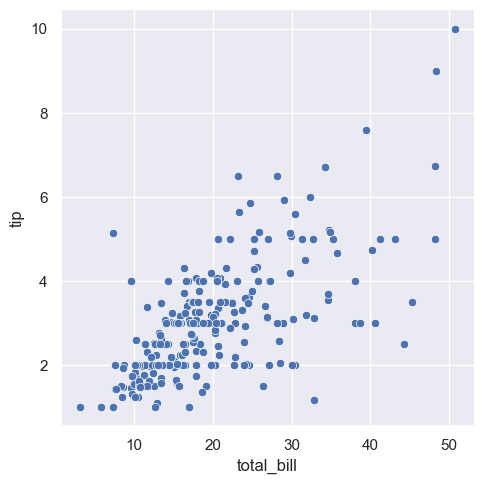

In [7]:
# total_bill 과 tip 은 양의 상관관계를 가지고 있는 것을 볼 수 있다. 

sns.relplot(data=tips, x="total_bill", y="tip");

- 포인트가 2차원으로 그려지는 동안 세 번째 변수에 따라 포인트에 색상을 지정하여 다른 차원을 플롯에 추가할 수 있습니다. 
- seaborn에서는 포인트의 색상에 의미를 부여하기 때문에 이를 'hue semantic'을 사용한다고 합니다:

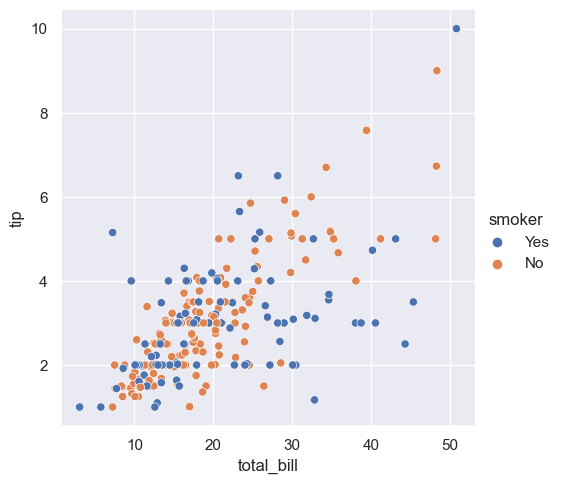

In [6]:
# 그리고 smoker 여부를 hue 로 지정해 색상을 구분시켰다. 

sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker");

- 클래스 간의 차이를 강조하고 accessibility를 향상시키기 위해 각 클래스에 다른 마커 스타일을 사용할 수 있습니다.

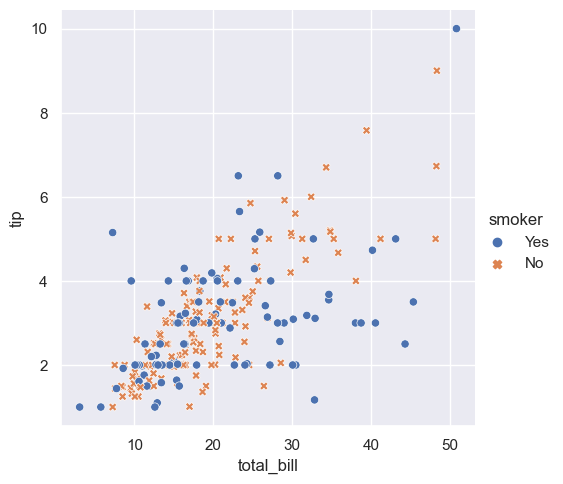

In [10]:
# style 을 통해 smoker인지 차이에 따라 마커의 모양을 변경시켰다. 

sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="smoker");

- 각 포인트의 색조와 스타일을 독립적으로 변경하여 네 가지 변수를 표현할 수도 있습니다. 
- 그러나 우리가 볼때 모양은 구분이 잘 안되기 때문에 이 작업을 한다면 고민을 하고 결정해야 합니다. 

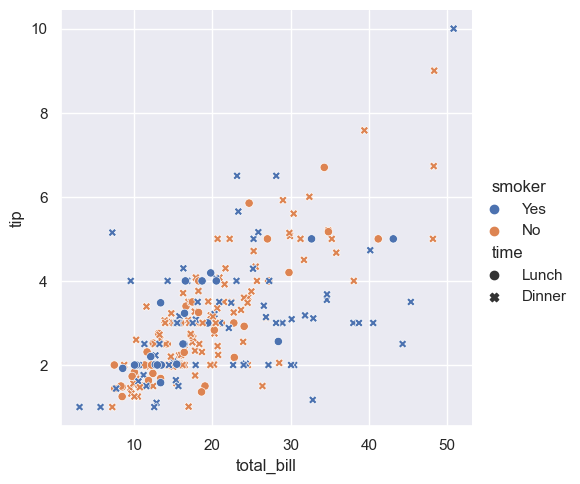

In [13]:
# 지금 색상과 마커가 다 다른 변수가 입력되어 있어서 구분이 잘 되지 않기는 하다.

sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="time",
);

- 위의 예에서는 hue semantic이 범주형이었으므로 default qualitative palette가 적용되었습니다. 
- hue semantic이 숫자인 경우(특히 float) 기본 색상은 sequential palette 입니다

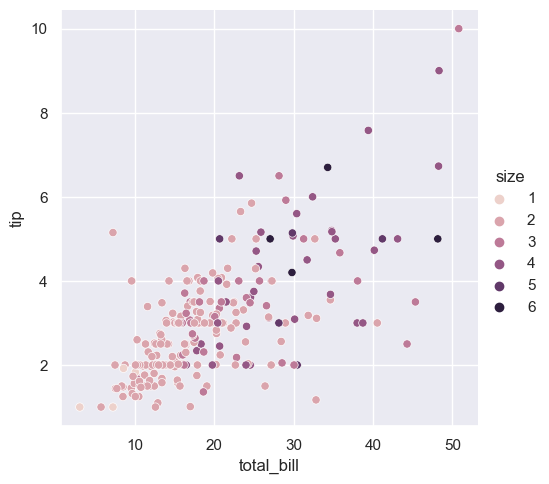

In [15]:
# hue가 숫자 형태면, 숫자의 범위에 맞춰 색이 진해지는 형식으로 출력이 된다.  
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size",
);

- 두 경우 모두 색상 팔레트를 사용자 지정할 수 있습니다. 
- 이를 위한 다양한 옵션이 있습니다. 
- 여기서는 문자열 인터페이스를 사용하여 cubehelix_palette()에 대한 sequential palette를 사용자 정의합니다

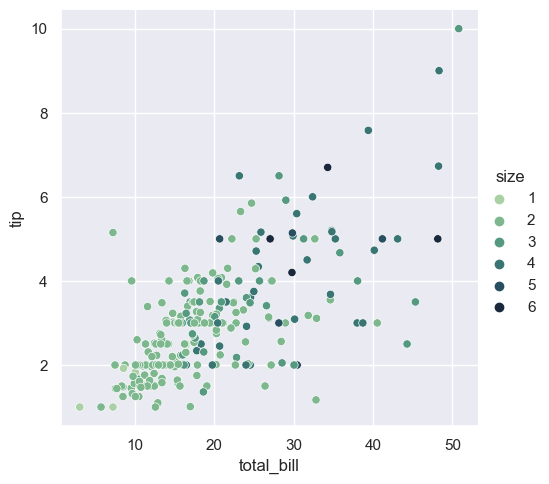

In [16]:
# 색의 범위를 지정해준 듯 하다. 
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    hue="size", palette="ch:r=-.5,l=.75"
);

- 세 번째 종류의 시맨틱 변수는 각 점의 크기를 변경하는 것입니다. 

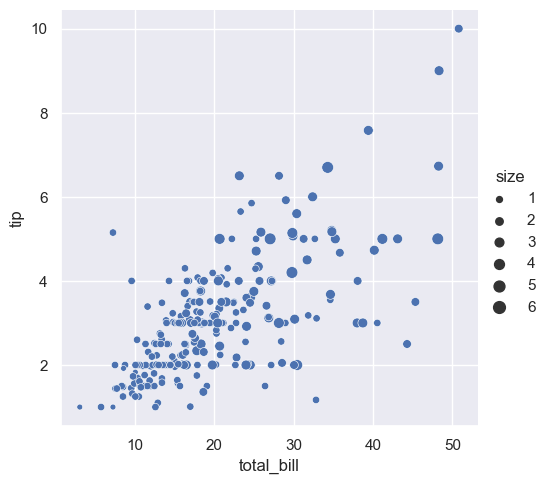

In [17]:
sns.relplot(data=tips, x="total_bill", y="tip", size="size");

- matplotlib.pyplot.scatter()와 달리, 
- 변수의 리터럴 값은 점의 면적을 선택하는 데 사용되지 않습니다. 
- 대신 데이터 단위의 값 범위가 면적 단위의 범위로 정규화됩니다. 
- 이 범위는 사용자 지정할 수 있습니다
- 통계적 관계를 표시하기 위해 다양한 의미를 사용하는 방법을 사용자 정의하는 더 많은 예는 scatterplot() API 예제에 나와 있습니다.

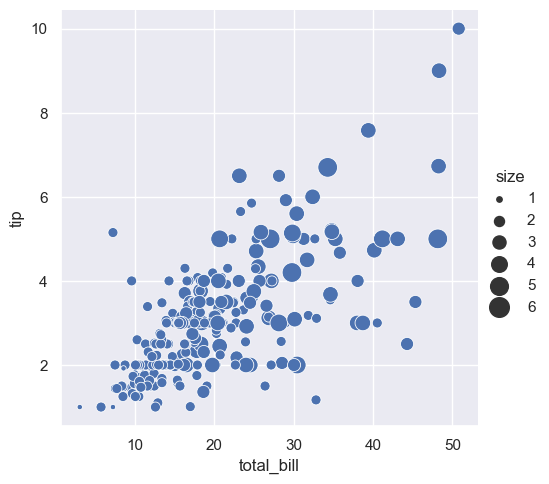

In [18]:
# 우리가 size를 지정할 수 있다. 
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(15, 200)
);

# Emphasizing continuity with line plots
(라인 플롯으로 연속성 강조하기)

- Scatter plots은 매우 효과적이지만, 보편적으로 최적의 시각화 유형은 없습니다. 
- 대신, 시각적 표현은 데이터 집합의 세부 사항과 플롯을 통해 답을 구하려는 질문에 맞게 조정되어야 합니다.

- 일부 데이터 집합에서는 한 변수의 변화를 시간에 따른 함수 또는 이와 유사한 연속형 변수로 이해하고 싶을 수 있습니다.
- 이러한 상황에서는 라인 플롯을 그리는 것이 좋습니다. 
- seaborn에서는 lineplot() 함수를 직접 사용하거나 relplot()과 함께 kind="line"을 설정하여 이 작업을 수행할 수 있습니다:

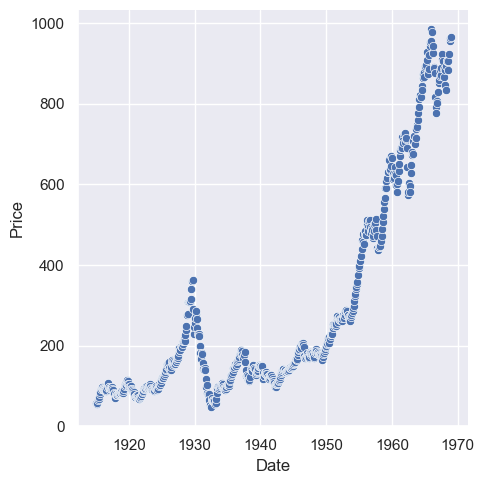

In [6]:
# kind='line' 설정을 하지 않았을 경우 => 연속형 변수이지만, 표현은 점으로 되어 있음. 
sns.relplot(data=dowjones, x="Date", y="Price");

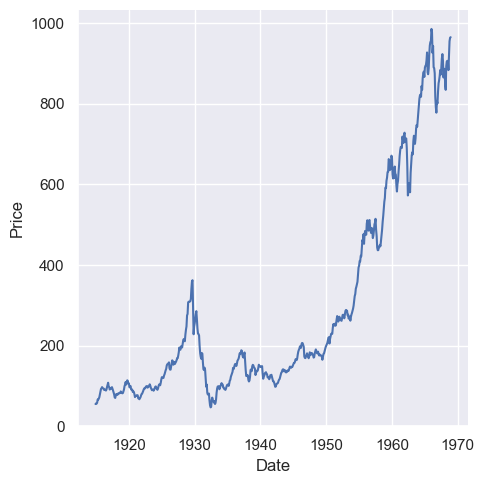

In [8]:
# 설정할 경우
sns.relplot(data=dowjones, x="Date", y="Price", kind="line");

## Aggregation and representing uncertainty

- 더 복잡한 데이터 집합에는 동일한 x 변수 값에 대한 여러 측정값이 있습니다.
- seaborn의 기본 동작은 평균과 평균 주위의 95% 신뢰 구간을 플로팅하여 각 x 값에 대한 여러 측정값을 집계하는 것입니다.

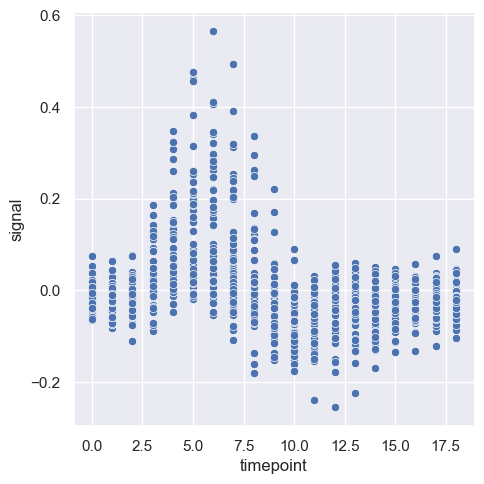

In [10]:
# kind='line' 설정을 하지 않았을 경우 => 연속형 변수이지만, 표현은 점으로 되어 있음. 

sns.relplot(data=fmri, x="timepoint", y="signal");

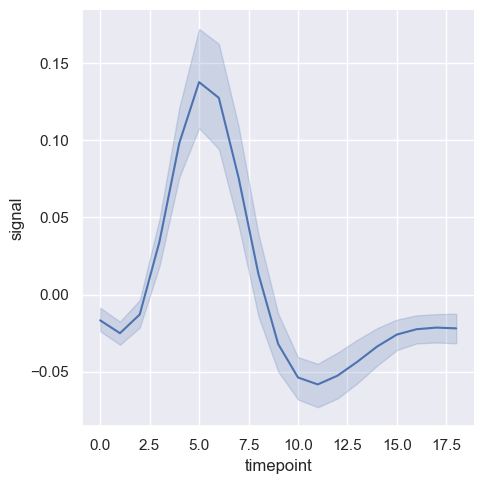

In [11]:
# 설정할 경우 => 회귀선과 그 값들의 분포를 선과 색으로 구분지어 출력함

sns.relplot(data=fmri, x="timepoint", y="signal", kind="line");

- 신뢰 구간은 부트스트래핑을 사용하여 계산되며, 대규모 데이터 세트의 경우 시간이 많이 소요될 수 있습니다. 
- 따라서 이를 비활성화할 수 있습니다:
- errorbar(오차막대)는 하나의 값에 대한 범위를 표현하며(표준편차, 신뢰구간 등), errorbar=None을 해주면, 위에 있는 신뢰구간 값의 분포를 제거한 후 출력한다.

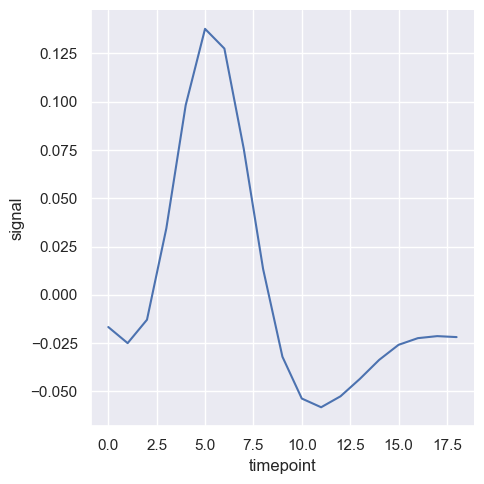

In [12]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar=None,
);

- 특히 데이터가 큰 경우 신뢰 구간 대신 표준 편차를 플롯하여 각 시점의 분포 확산을 나타내는 것도 좋은 옵션입니다.

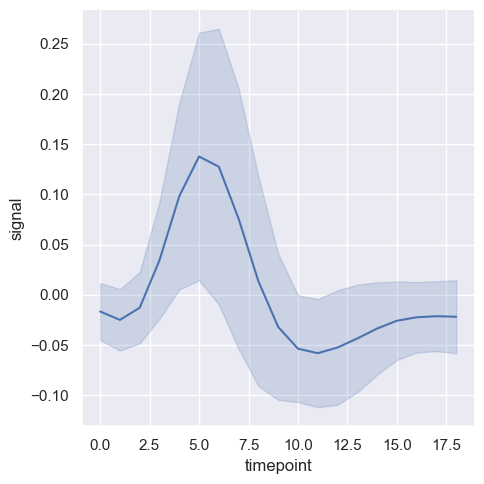

In [13]:
# errorbar="sd" => 표준편차 분포 표현

sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar="sd",
);

- 집계를 모두 끄려면 estimator 매개 변수를 None으로 설정합니다. 데이터에 각 지점에 여러 관측값이 있는 경우 이상한 현상이 발생할 수 있습니다.
- estimator 변수를 통해 값을 집계하여 회귀선, 신뢰구간을 표시한다던가, 표준편차를 표시한다던가 할 수 있지만, estimator를 제거하면, 기존의 수집된 값을 그대로 line 형태로 출력합니다.

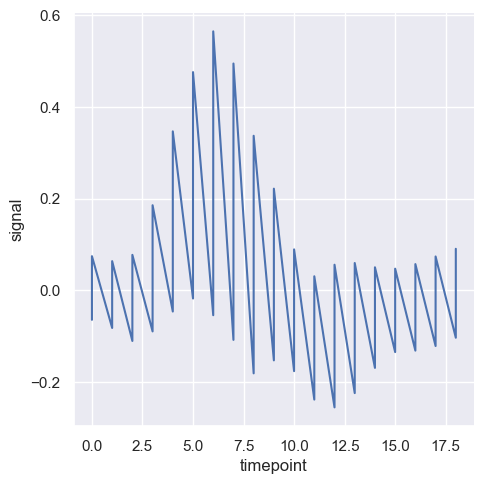

In [16]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    estimator=None,
);

## Plotting subsets of data with semantic mappings

- lineplot() 함수는 scatterplot()과 같은 유연성을 가지며, 플롯 요소의 색상(hue), 크기(size) 및 스타일(style)을 수정하여 최대 세 가지 추가 변수를 표시할 수 있습니다. 
- 이는 matplotlib에서 선과 점의 모양을 제어하는 매개변수를 생각하고 멈춰서 고민할 필요가 없다는 것을 의미합니다.

- lineplot()에서 시맨틱을 사용하면 데이터가 어떻게 집계되는지도 결정됩니다. 
- 예를 들어, 두 개의 수준을 가진 색상(hue) 시맨틱을 추가하면 플롯을 두 개의 라인 및 오차 막대로 분할하여 각각 어떤 데이터 하위 집합에 해당하는지 나타내기 위해 색상을 사용합니다.

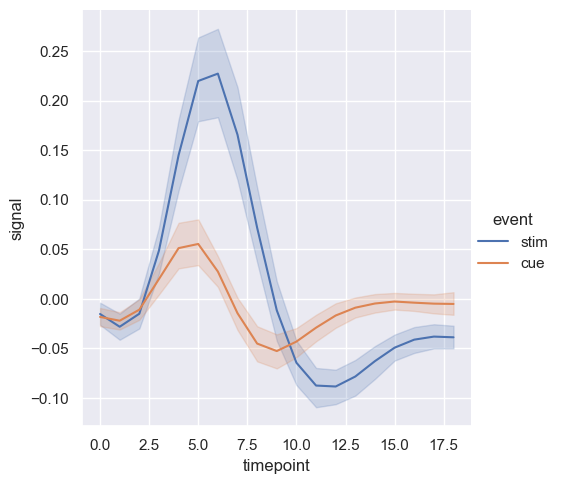

In [2]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event",
);

- lineplot()에 스타일 시맨틱을 추가하면 기본적으로 라인의 대시 패턴이 변경됩니다:

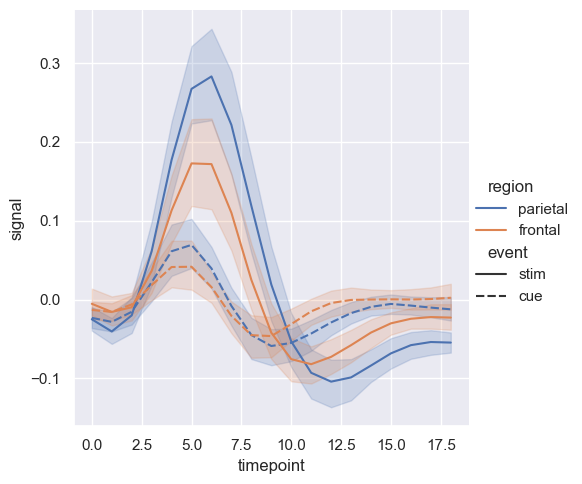

In [3]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event",
);

- 그러나 각 관찰에 사용된 마커를 대시와 함께 또는 대시 대신 사용하여 하위 집합을 식별할 수 있습니다:

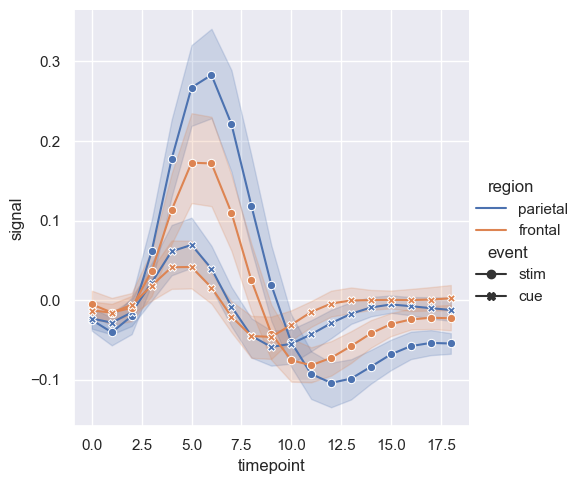

In [4]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
);

- 산점도와 마찬가지로, 여러 시맨틱을 사용하여 라인 플롯을 만드는 경우 주의해야 합니다. 
- 때로는 정보를 전달할 수 있지만, 해석하기 어려울 수도 있습니다. 
- 그러나 추가 변수를 통해 변경 사항만 살펴볼 때라도 라인의 색상과 스타일을 모두 변경하는 것이 유용할 수 있습니다. 
- 이렇게 하면 흑백으로 출력하거나 색맹인 사람이 보는 경우에도 더 쉽게 플롯을 이해할 수 있습니다.

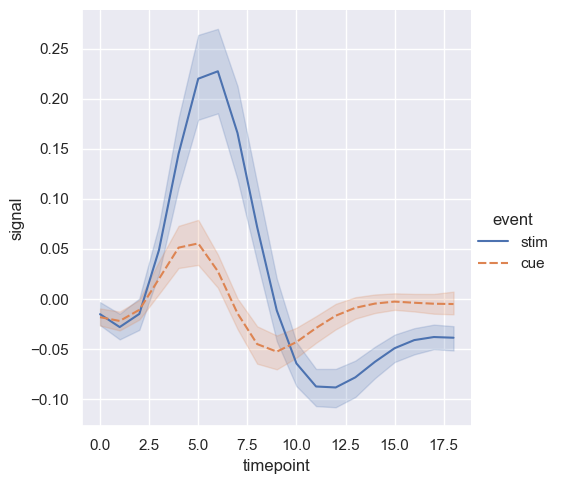

In [5]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event", style="event",
);

- 반복 측정 데이터를 다룰 때 (즉, 여러 번 샘플링된 단위가 있는 경우), 
- 시맨틱을 통해 구분하지 않고 각 샘플링 단위를 별도로 플롯할 수도 있습니다. 
- 이렇게 하면 범례가 혼잡해지는 것을 방지할 수 있습니다.

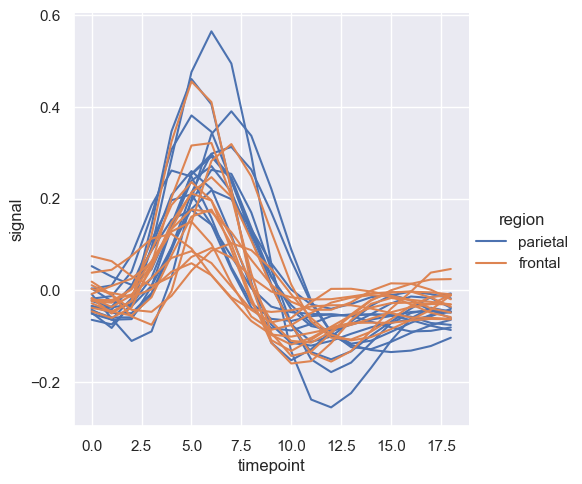

In [6]:
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,
);

- lineplot()의 기본 컬러맵과 범례 처리도 hue 시맨틱이 범주형인지 숫자형인지에 따라 달라집니다:

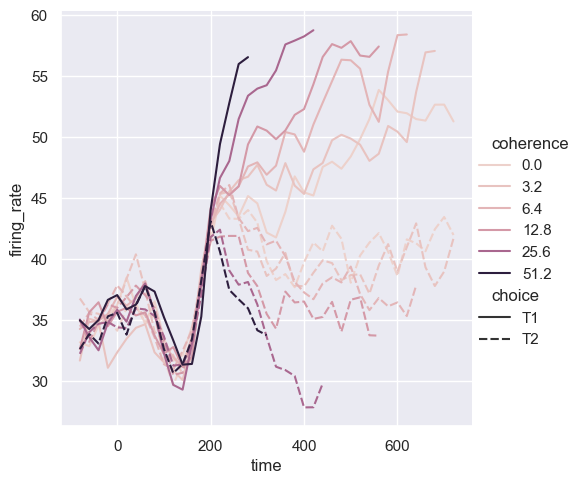

In [7]:
# coherence = '일관성'

dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
);

- 색상 변수가 숫자형이지만, 선형적인 색상 척도로 표현하기에는 적합하지 않은 경우가 있습니다. 
- 여기에서는 색상 변수의 수준이 로그 스케일로 조정되는 경우입니다. 
- 이 경우 리스트나 딕셔너리를 전달하여 각 라인에 대한 구체적인 색상 값을 제공할 수 있습니다.

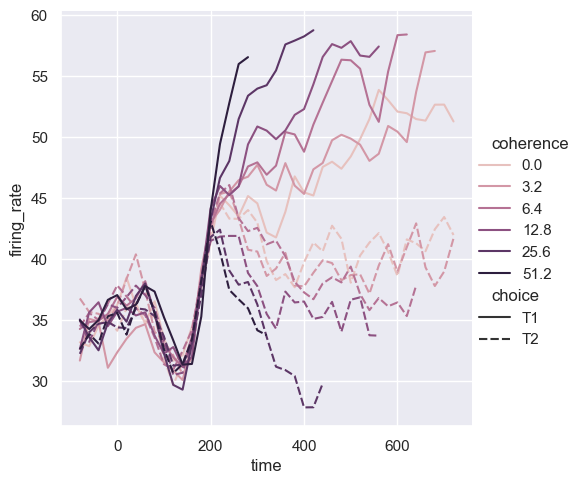

In [8]:
# 색이 더 진해짐. 

palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice", palette=palette,
);

- 또는 컬러맵 정규화 방식을 변경할 수도 있습니다:

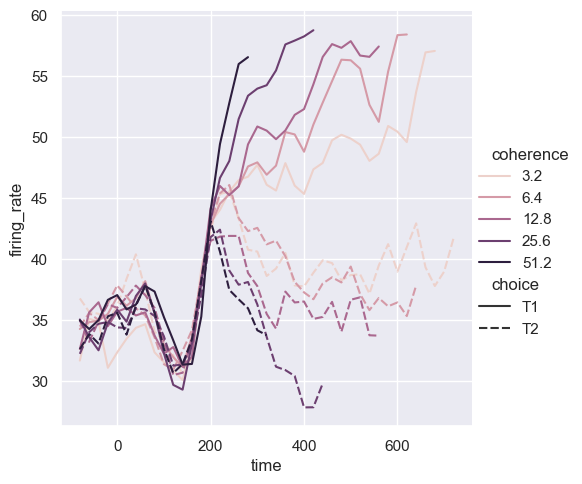

In [9]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(
    data=dots.query("coherence > 0"), kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
    hue_norm=LogNorm(),
);

- 세 번째 시맨틱인 사이즈 변수는 선의 너비를 변경합니다:

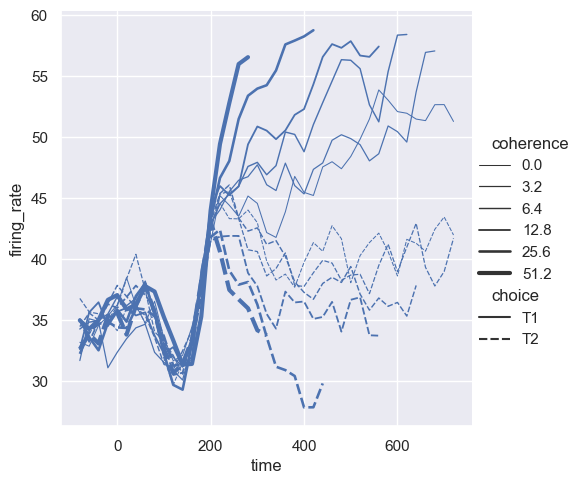

In [10]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    size="coherence", style="choice",
);

- 일반적으로 사이즈 변수는 숫자형이지만, 라인의 너비에 범주형 변수를 매핑하는 것도 가능합니다. 
- 이렇게 하면 "두꺼운" vs "얇은" 라인 이상을 구별하기 어려울 수 있으므로 주의해야 합니다. 
- 그러나 라인에 고주파 변동이 있는 경우 대시가 인식하기 어려울 수 있으므로, 이 경우에는 다른 두께를 사용하는 것이 더 효과적일 수 있습니다.

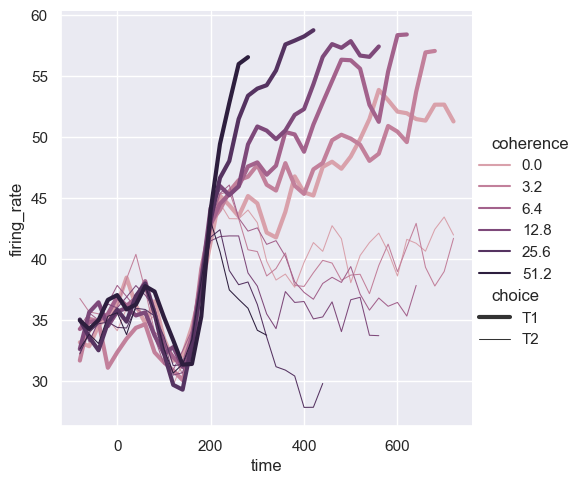

In [11]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", size="choice", palette=palette,
);